In [1]:
import sys
sys.path.append('../')

# Load libraries
from utils.load import load
from utils.save import save_dataset
from scipy.signal import butter, filtfilt

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load datasets
df = load('../dump/df.p')
print(df.head())

                         timestamp  cpu_usage  memory_usage  \
time                                                          
2023-09-08 01:16:00  1694110560000      0.090         0.535   
2023-09-08 01:16:05  1694110565000      0.166         0.533   
2023-09-08 01:16:10  1694110570000      0.202         0.553   
2023-09-08 01:16:15  1694110575000      0.146         0.580   
2023-09-08 01:16:20  1694110580000      0.102         0.535   

                     bandwidth_inbound  bandwidth_outbound  tps  tps_error  \
time                                                                         
2023-09-08 01:16:00             7460.0              6450.0  2.0        0.0   
2023-09-08 01:16:05             5850.0              5270.0  2.2        0.0   
2023-09-08 01:16:10             9060.0              7960.0  3.2        0.0   
2023-09-08 01:16:15             8410.0              7210.0  3.2        0.0   
2023-09-08 01:16:20             4880.0              4300.0  2.6        0.0   

           

### Observing data

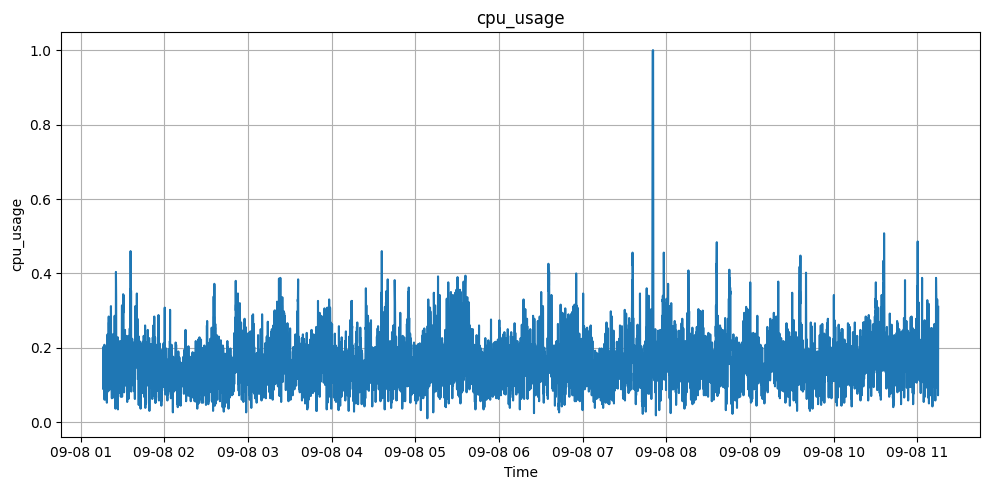

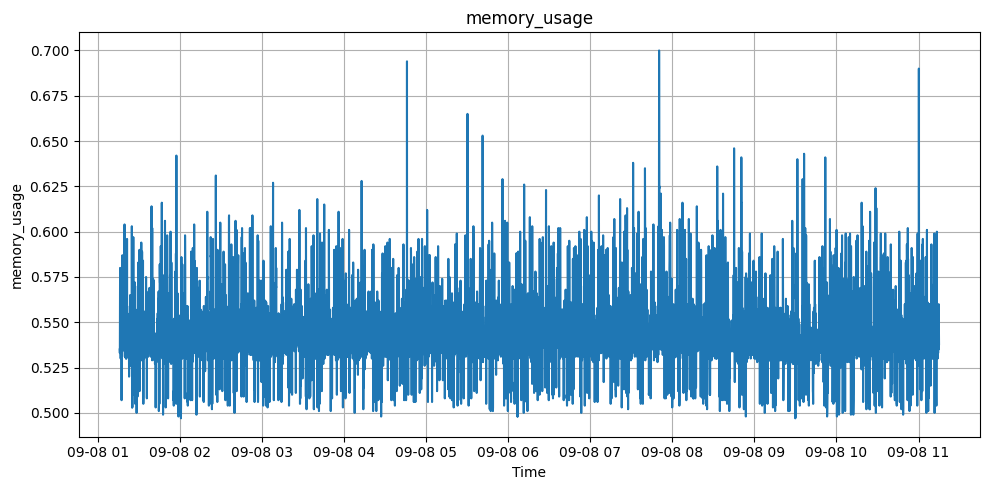

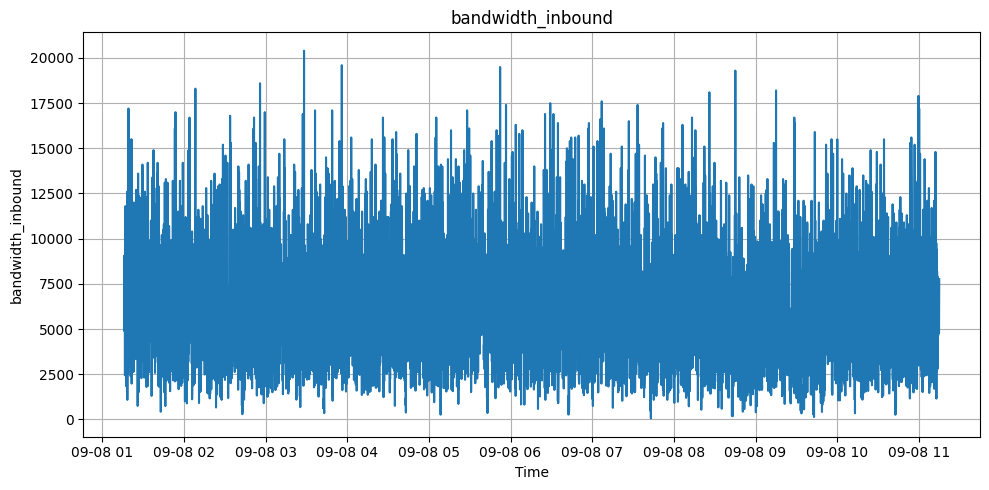

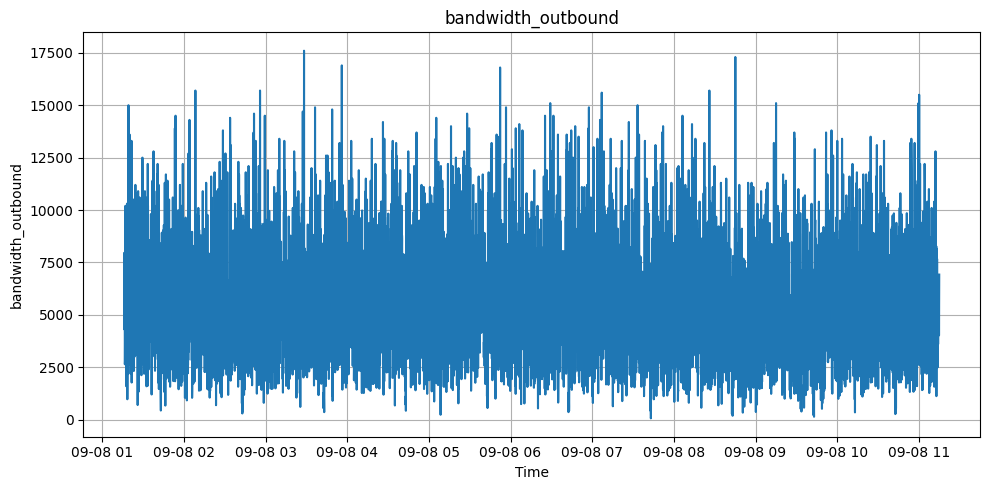

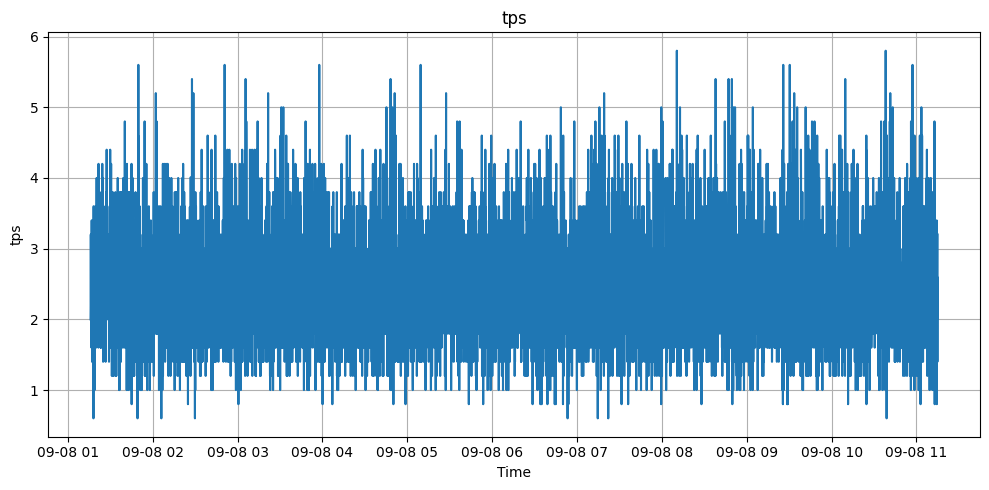

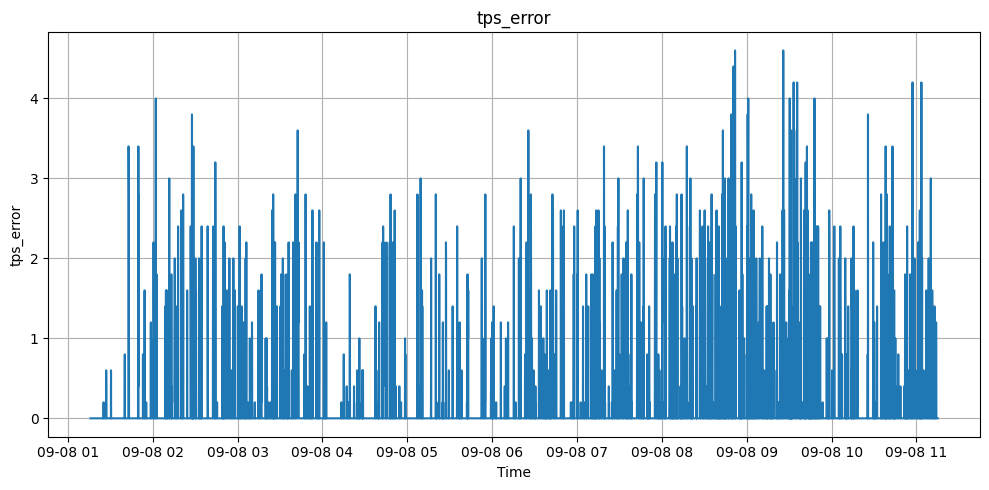

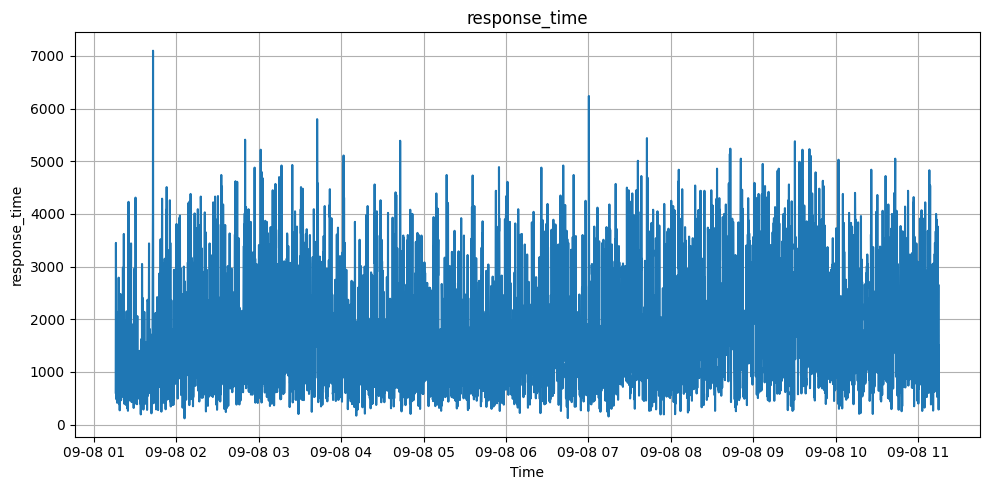

In [3]:
# Plotting each feature
for column in df.columns:
    if column == 'time' or column == 'timestamp' or column == 'status':
        continue
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[column])  # Removed the marker argument
    plt.title(column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Reducing noise

In [4]:
# Define the Butterworth filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [5]:
# Filter settings: Choose your values based on the data characteristics
fs = 5       # sampling frequency (e.g., 5 samples per second in your data since it's sampled every 5 seconds)
cutoff = 0.8  # desired cutoff frequency
order = 3     # order of the filter

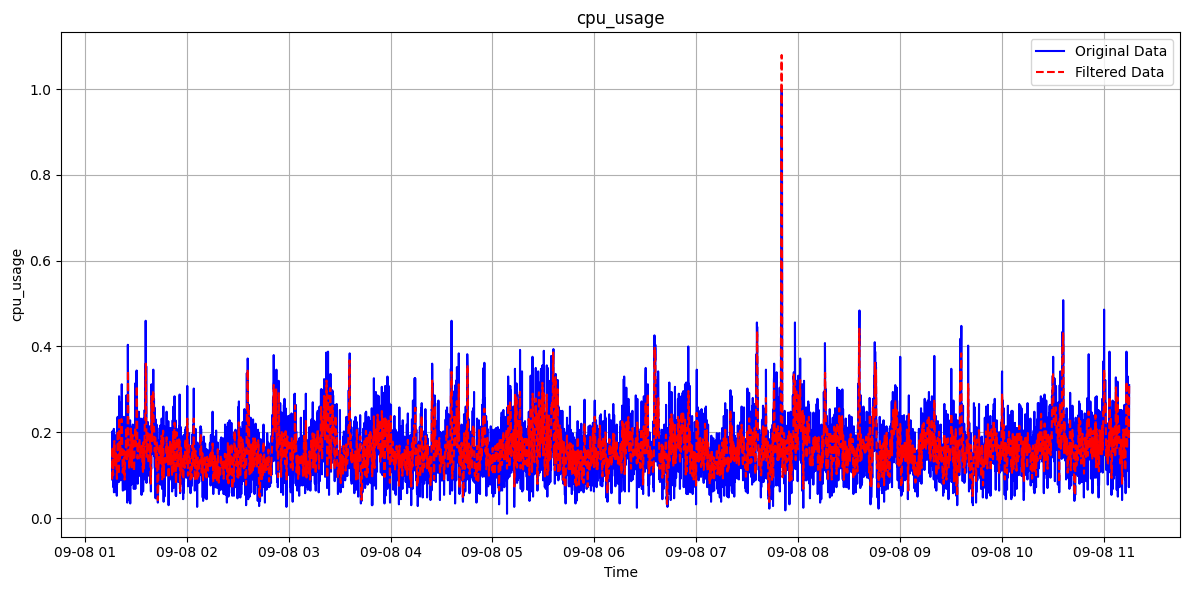

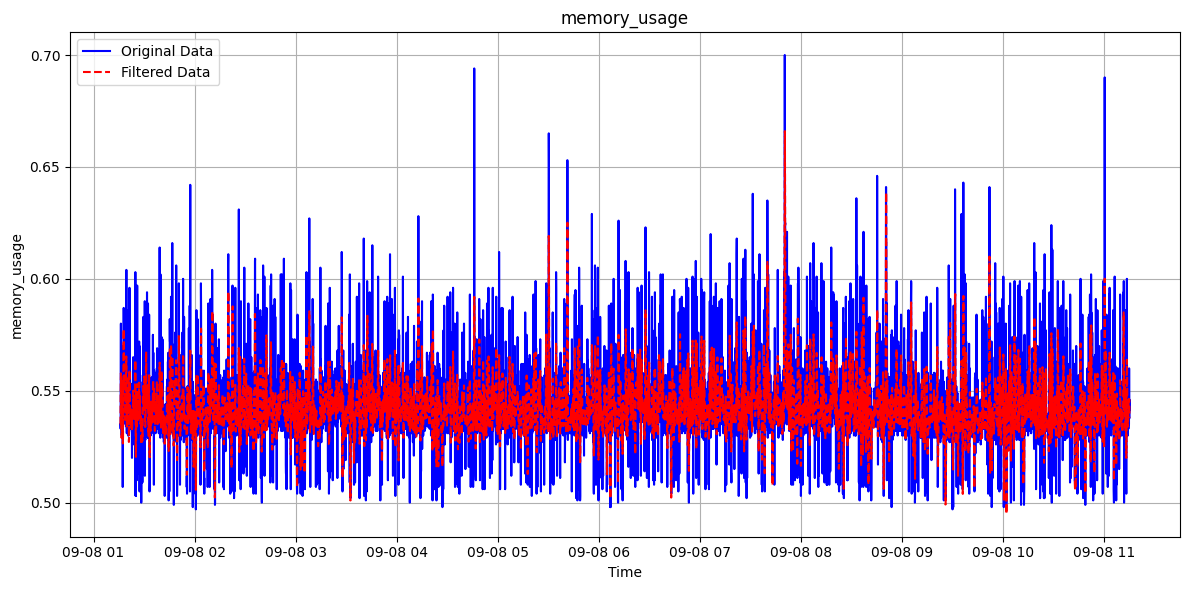

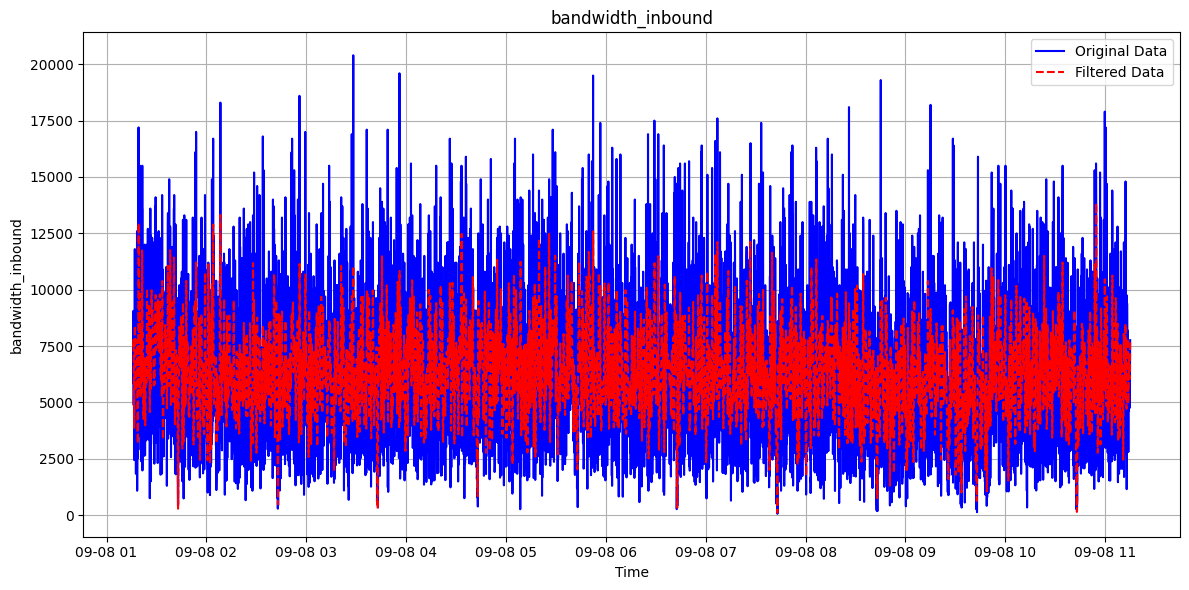

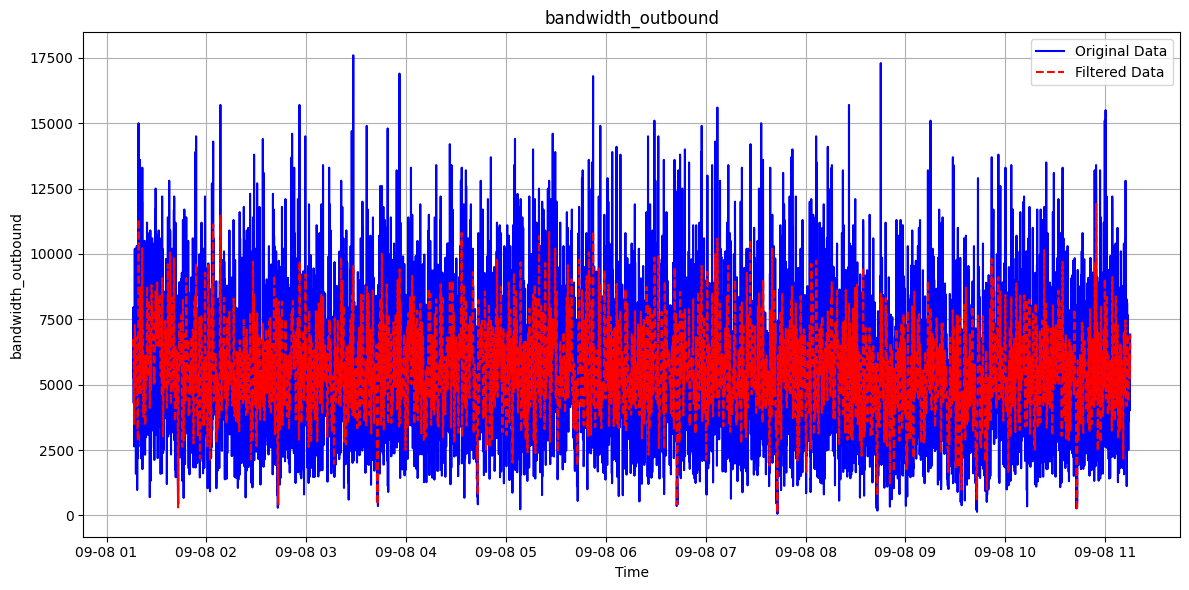

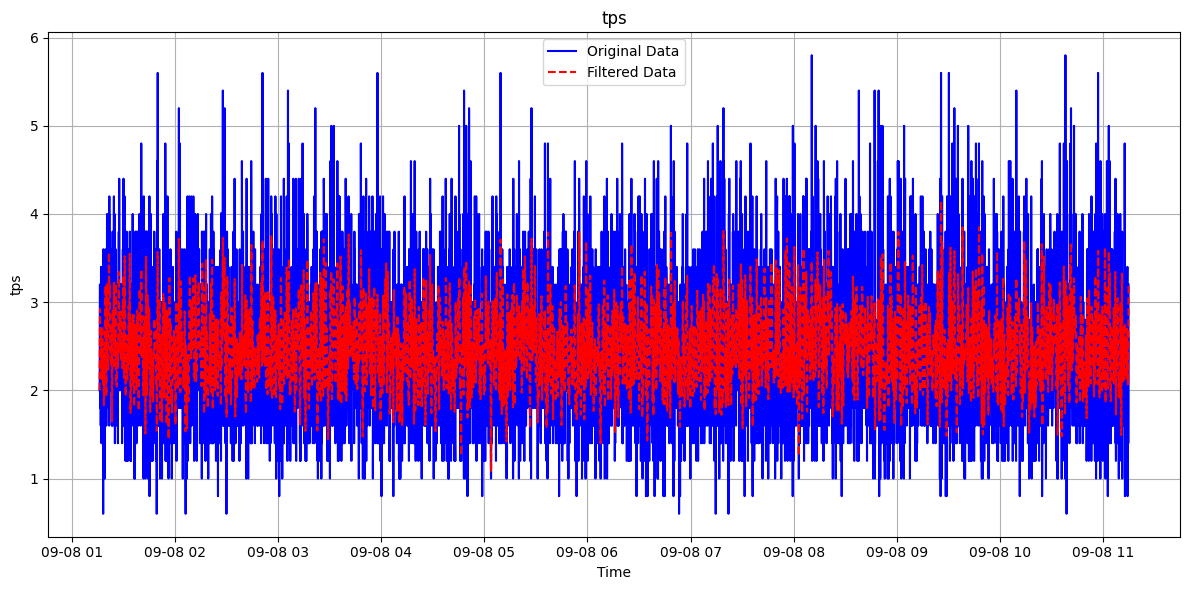

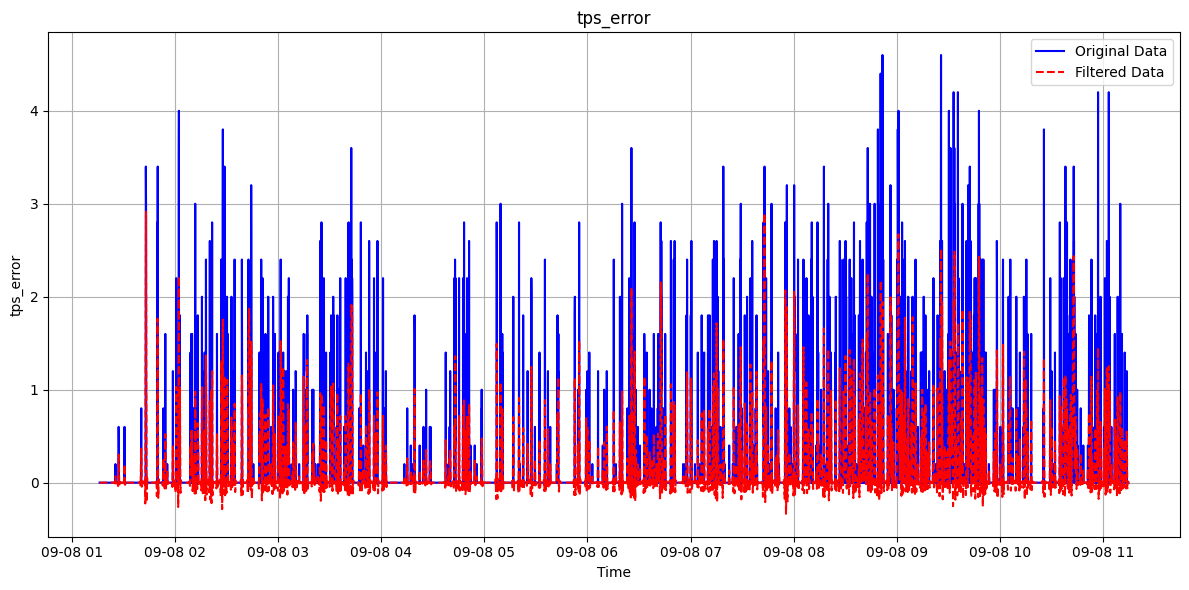

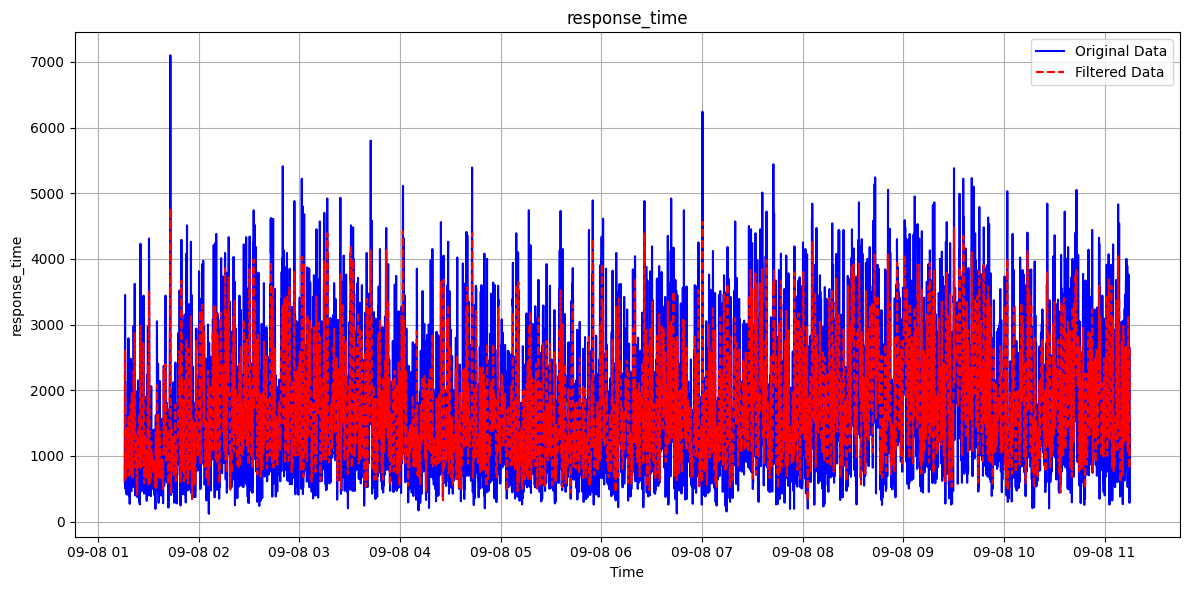

In [6]:
filtered_df = pd.DataFrame(index=df.index)

for column in df.columns:
    if column == 'time' or column == 'timestamp' or column == 'status':
        continue
    filtered_data = butter_lowpass_filter(df[column], cutoff, fs, order)
    filtered_df[column] = filtered_data
    
    # Plotting both original and filtered data (same as before)
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column], label='Original Data', color='blue')
    plt.plot(df.index, filtered_data, label='Filtered Data', color='red', linestyle='--')
    plt.title(column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Exporting data

In [7]:
save_dataset(filtered_df, '../dump/filtered_df.p')